In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv('data/nyc_taxi.csv', engine='python')
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [3]:
# Convert the timestamp string to datetime datatype (year, month, day, hour)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [4]:
# Setperating the timestamp columns into seperate columns
df['Year'] = df.timestamp.dt.year
df['Month'] = df.timestamp.dt.month
df['Day'] = df.timestamp.dt.day
df['Hour'] = df.timestamp.dt.hour
df.head()

,timestamp,value,Year,Month,Day,Hour
0,2014-07-01 00:00:00,10844,2014,7,1,0
1,2014-07-01 00:30:00,8127,2014,7,1,0
2,2014-07-01 01:00:00,6210,2014,7,1,1
3,2014-07-01 01:30:00,4656,2014,7,1,1
4,2014-07-01 02:00:00,3820,2014,7,1,2


In [5]:
# Checking the unique values available in each column
print('Unique number of years: ', df.Year.unique())
print('Unique number of months: ', df.Month.unique())
print('Unique number of days: ', df.Day.unique())
print('Unique number of hours: ', df.Hour.unique())

Unique number of years:  [2014 2015]
Unique number of months:  [ 7  8  9 10 11 12  1]
Unique number of days:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique number of hours:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [6]:
df['value'].mean()

15137.569379844961

/Users/mohammedalhamid/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


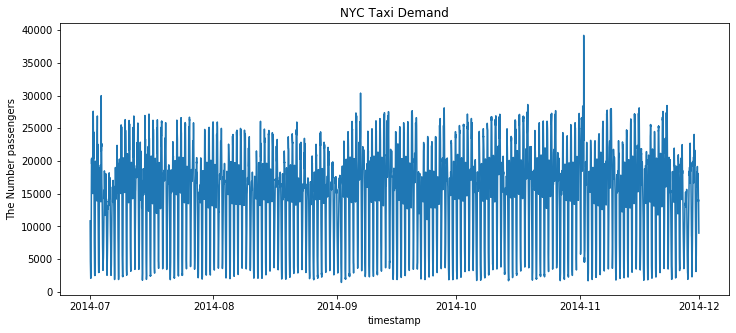

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df.iloc[0:7344]['timestamp'], df.iloc[0:7344]['value'])
ax.set_title('NYC Taxi Demand')
plt.xlabel('timestamp')
plt.ylabel('The Number passengers')
plt.show()

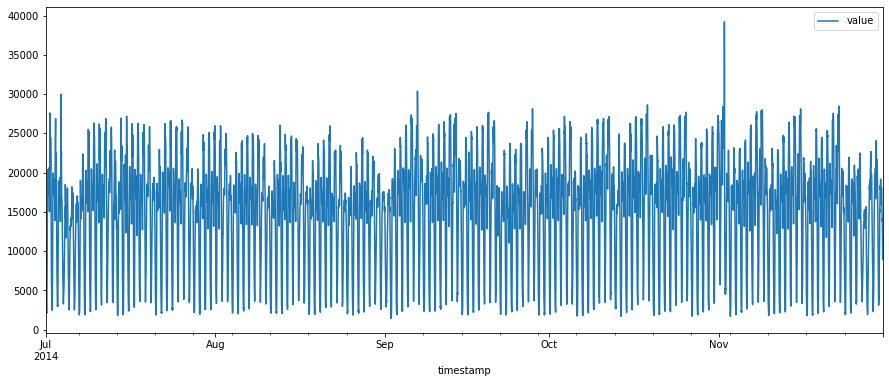

In [8]:
# Plotting a sample of the data
# January, 2014 ~ November 2014
df.iloc[0:7344,:].plot(y='value', x='timestamp', figsize=(15,6))

In [9]:
df.shape

(10320, 6)

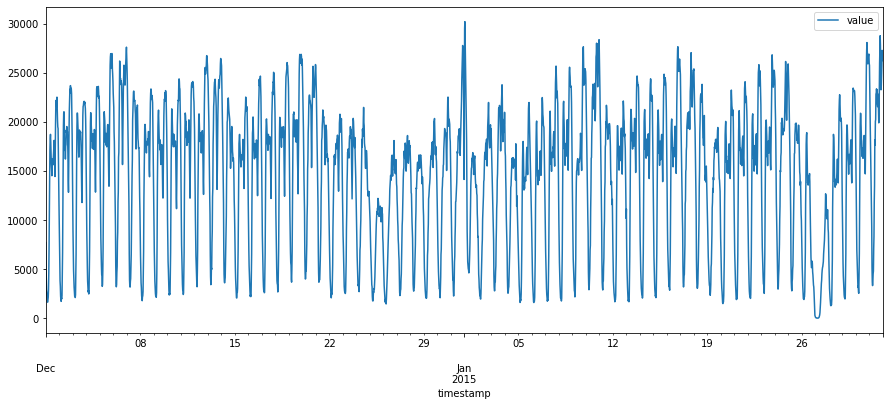

In [10]:
# Plotting a sample of the data
# December, 2014 ~ January 201
df.iloc[7344:10320,:].plot(y='value', x='timestamp', figsize=(15,6))

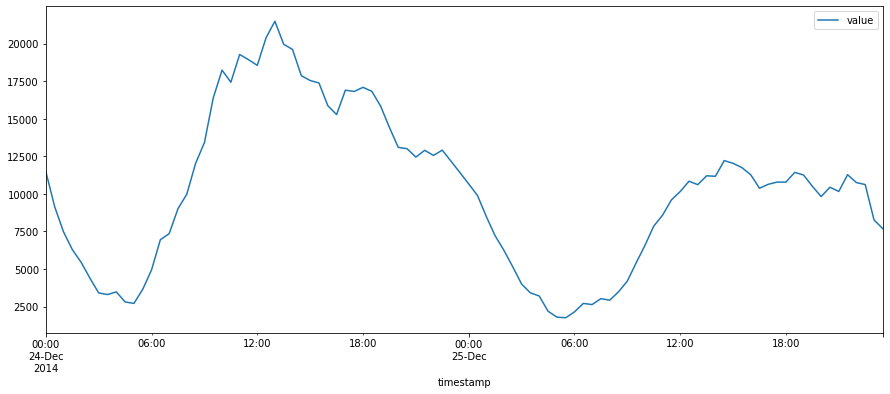

In [11]:
# December 24 ~ December 25
df.iloc[8448:8544,:].plot(y='value', x='timestamp', figsize=(15,6))

In [12]:
# Number of readings per day
df[(df['Day'] == 1) & (df['Month'] == 7) & (df['Year'] == 2014)]

,timestamp,value,Year,Month,Day,Hour
0,2014-07-01 00:00:00,10844,2014,7,1,0
1,2014-07-01 00:30:00,8127,2014,7,1,0
2,2014-07-01 01:00:00,6210,2014,7,1,1
3,2014-07-01 01:30:00,4656,2014,7,1,1
4,2014-07-01 02:00:00,3820,2014,7,1,2
5,2014-07-01 02:30:00,2873,2014,7,1,2
6,2014-07-01 03:00:00,2369,2014,7,1,3
7,2014-07-01 03:30:00,2064,2014,7,1,3
8,2014-07-01 04:00:00,2221,2014,7,1,4
9,2014-07-01 04:30:00,2158,2014,7,1,4


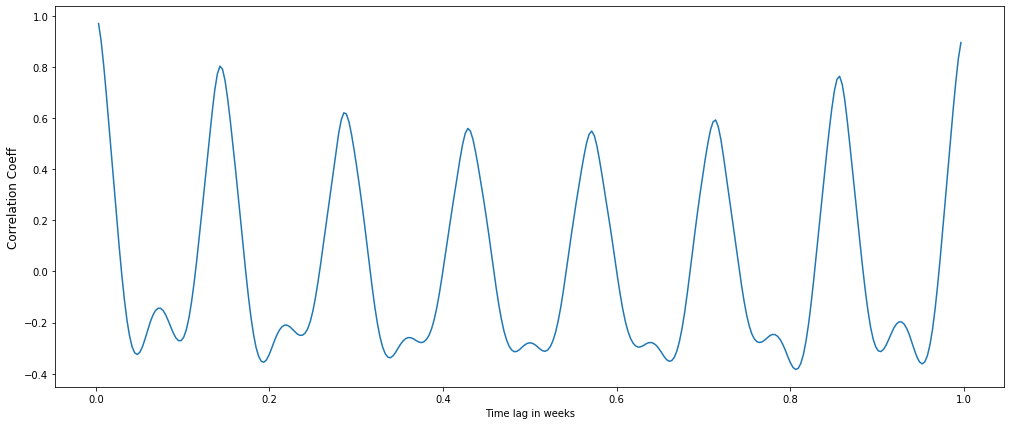

In [13]:
# Autocorrelation in timeseries (Weeks)
# The correlation coefficient is a measure of the linear correlation between two variables.
# 48 read per day per 7 days a week
timeLags = np.arange(1,48*7)
autoCorr = [df.value.autocorr(lag=dt) for dt in timeLags]
plt.figure(figsize=(17,7))
plt.plot(1.0/(48*7)*timeLags, autoCorr);
plt.xlabel('Time lag in weeks'); plt.ylabel('Correlation Coeff', fontsize=12);

# Featurization 

We have created new columns from timestamp. We can also generate additional new features from the timestamp. 
- (1) Adding day of a week in addition to the day of a month
- (2) The average of rides per a particular hour for the same day of the week. 
- (3) Number of rides during the day and during the night.

In [14]:
# (1) Adding day of the week.
df['Weekday'] = df.timestamp.dt.weekday

In [15]:
df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday
0,2014-07-01 00:00:00,10844,2014,7,1,0,1
1,2014-07-01 00:30:00,8127,2014,7,1,0,1
2,2014-07-01 01:00:00,6210,2014,7,1,1,1


In [16]:
# (2) Adding the average of rides grouped by the weekday and hour
# 7 Days, 24 Hours = 168 values
len(df[:7344].groupby(df.Weekday.astype(str) + ' ' + df.Hour.astype(str))['value'].mean().to_dict())

168

In [17]:
df['avg_hour_day'] = df.Weekday.astype(str) + ' ' + df.Hour.astype(str)
df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,1 0
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,1 0
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,1 1


In [18]:
df.avg_hour_day = df.avg_hour_day.replace(df[:7344].groupby(df.Weekday.astype(str) + ' ' + df.Hour.astype(str))['value'].mean().to_dict())
df.head(10)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,8764.000000
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,8764.000000
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,5185.272727
3,2014-07-01 01:30:00,4656,2014,7,1,1,1,5185.272727
4,2014-07-01 02:00:00,3820,2014,7,1,2,1,3112.181818
5,2014-07-01 02:30:00,2873,2014,7,1,2,1,3112.181818
6,2014-07-01 03:00:00,2369,2014,7,1,3,1,2075.431818
7,2014-07-01 03:30:00,2064,2014,7,1,3,1,2075.431818
8,2014-07-01 04:00:00,2221,2014,7,1,4,1,2083.613636
9,2014-07-01 04:30:00,2158,2014,7,1,4,1,2083.613636


In [19]:
# (3) Featuring the number of rides during the day and during the night.
# We define the day time to be any hours between 6 AM and 10 PM while Night time where usually there is less 
# demand is any time between 10:00 PM and 6:00 AM
df['day_time'] = ((df['Hour'] >= 6) & (df['Hour'] <= 22)).astype(int)

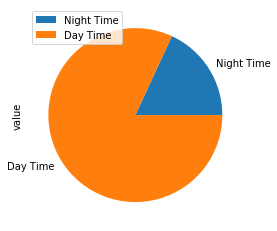

In [20]:
df.groupby(['day_time']).sum().plot(kind='pie', y='value', labels=['Night Time', 'Day Time']) 

Text(0, 0.5, 'Frequency')

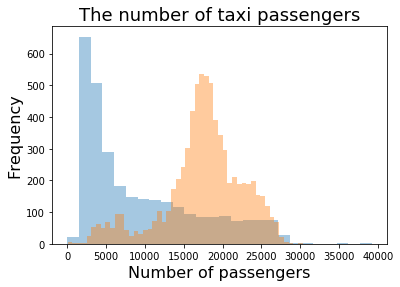

In [21]:
sns.distplot(df.loc[df['day_time'] == 0]['value'], kde = False)
sns.distplot(df.loc[df['day_time'] == 1]['value'], kde = False);
plt.title('The number of taxi passengers', fontsize=18)
plt.xlabel('Number of passengers', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

### Data Preperation 

In [22]:
df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day,day_time
0,2014-07-01 00:00:00,10844,2014,7,1,0,1,8764.000000,0
1,2014-07-01 00:30:00,8127,2014,7,1,0,1,8764.000000,0
2,2014-07-01 01:00:00,6210,2014,7,1,1,1,5185.272727,0


In [23]:
# Normalizing the values
standard_scaler = preprocessing.StandardScaler()
scaled_data = standard_scaler.fit_transform(df[['Hour', 'day_time', 'Weekday', 'avg_hour_day', 'value']])

In [24]:
scaled_df = df.copy()

In [25]:
scaled_df['Hour'] = scaled_data[:,0]
scaled_df['day_time'] = scaled_data[:,1]
scaled_df['Weekday'] = scaled_data[:,2]
scaled_df['avg_hour_day'] = scaled_data[:,3]
scaled_df['value'] = scaled_data[:,4]
scaled_df.head(3)

,timestamp,value,Year,Month,Day,Hour,Weekday,avg_hour_day,day_time
0,2014-07-01 00:00:00,-0.618745,2014,7,1,-1.661325,-1.005865,-1.002380,-1.558387
1,2014-07-01 00:30:00,-1.010291,2014,7,1,-1.661325,-1.005865,-1.002380,-1.558387
2,2014-07-01 01:00:00,-1.286549,2014,7,1,-1.516862,-1.005865,-1.546894,-1.558387


In [26]:
# Specifying how many values to predict
time_step = 1 

### Splitting the dataset

In [27]:
training_size = int(len(scaled_df) * 0.9)
training, testing = scaled_df[0:training_size], scaled_df[training_size:len(df)]
print('Size of the dataset: %d' % (len(scaled_df)))
print('Training examples: %d' % (len(training)))
print('Testing examples: %d' % (len(testing)))

Size of the dataset: 10320
Training examples: 9288
Testing examples: 1032


In [28]:
# training features: Value, Hour, day_time
X_train = training[['value', 'Hour', 'day_time']].to_numpy()
y_train = scaled_df[time_step:testing.index[0] + time_step]['value'].to_numpy()

In [29]:
# testing data
X_test = testing[0:-time_step][['value', 'Hour', 'day_time']].to_numpy()
y_test = scaled_df[testing.index[0] + time_step:]['value'].to_numpy()

### Creating the data sequence 

In [30]:
# create sequences of (48-two readings per hour) data points for each training example
def create_sequence(dataset, length):
    data_sequences = []
    for index in range(len(dataset) - length):
        data_sequences.append(dataset[index: index + length])
    return np.asarray(data_sequences)

In [31]:
X_train = create_sequence(X_train, 48)
X_test  = create_sequence(X_test, 48)
y_train = y_train[-X_train.shape[0]:]
y_test  = y_test[-X_test.shape[0]:]

In [32]:
print("X_train shape={}, and y_train shape={}".format(X_train.shape, y_train.shape))
print("X_test shape={}, and y_test shape={}".format(X_test.shape, y_test.shape))

X_train shape=(9240, 48, 3), and y_train shape=(9240,)
X_test shape=(983, 48, 3), and y_test shape=(983,)


## Model Building 

In [33]:
# Building the model
model = Sequential()
# Adding a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(20,return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[-1]))))
model.add(Bidirectional(LSTM(20)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

In [34]:
# Training the model
model.fit(X_train, y_train, batch_size=1024, epochs=20)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





9240/9240 [==============================] - 14s 1ms/step - loss: 0.7194
Epoch 2/20
9240/9240 [==============================] - 7s 743us/step - loss: 0.3532
Epoch 3/20
9240/9240 [==============================] - 7s 741us/step - loss: 0.2552
Epoch 4/20
9240/9240 [==============================] - 7s 746us/step - loss: 0.2055
Epoch 5/20
9240/9240 [==============================] - 7s 778us/step - loss: 0.1791
Epoch 6/20
9240/9240 [==============================] - 7s 762us/step - loss: 0.1595
Epoch 7/20
9240/9240 [==============================] - 7s 799us/step - loss: 0.1415
Epoch 8/20
9240/9240 [==============================] - 7s 800us/step - loss: 0.1319
Epoch 9/20
9240/9240 [==============================] - 7s 795us/step - loss: 0.1212
Epoch 10/20
9240

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 48, 40)            3840      
_________________________________________________________________
bidirectional_2 (Bidirection (None, 40)                9760      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 41        
Total params: 13,641
Trainable params: 13,641
Non-trainable params: 0
_________________________________________________________________


### Evaluation

In [45]:
# create the list of difference between prediction and test data
predictions = model.predict(X_test)
predictions

array([[ 0.87849915],
       [ 0.9121821 ],
       [ 0.92418957],
       [ 0.92879784],
       [ 0.9288957 ],
       [ 0.9467229 ],
       [ 0.9393816 ],
       [ 0.89370143],
       [ 0.8522454 ],
       [ 0.83546275],
       [ 0.9271077 ],
       [ 1.0102538 ],
       [ 1.0080531 ],
       [ 0.9397062 ],
       [ 0.8492254 ],
       [ 0.6945838 ],
       [ 0.5368997 ],
       [ 0.2863415 ],
       [ 0.06656489],
       [-0.12079091],
       [-0.26591727],
       [-0.42828295],
       [-0.60962015],
       [-0.7893789 ],
       [-1.0843714 ],
       [-1.2535747 ],
       [-1.4310427 ],
       [-1.606107  ],
       [-1.7381732 ],
       [-1.8451937 ],
       [-1.909571  ],
       [-1.9426608 ],
       [-1.935133  ],
       [-1.884676  ],
       [-1.76767   ],
       [-1.5991911 ],
       [-1.3186895 ],
       [-1.0613785 ],
       [-0.6982384 ],
       [-0.34469116],
       [-0.04557578],
       [ 0.12631533],
       [ 0.2079009 ],
       [ 0.2512947 ],
       [ 0.25518885],
       [ 0

In [46]:
def evaluate_predictions(predictions, y_test, outliers):
    ratio = []
    differences = []
    for pred in range(len(y_test)):
        ratio.append((y_test[pred]/predictions[pred])-1)
        differences.append(abs(y_test[pred]- predictions[pred]))
    
    
    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)
    
    return ratio, differences, outliers

In [47]:
ratio, differences, outliers = evaluate_predictions(predictions, y_test, 0.01)

In [48]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

806   -1.093543
756   -0.760656
728   -0.046885
729   -0.108303
757   -0.838443
727    0.020337
740   -0.768264
807   -0.766343
739   -0.645859
dtype: float64

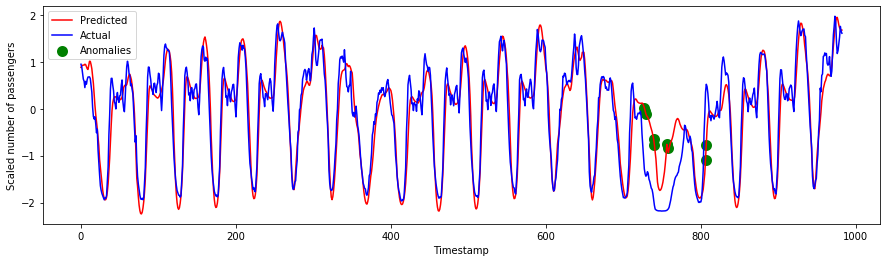

In [49]:
# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(y_test,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Scaled number of passengers')
plt.legend(loc='upper left')
plt.show()

# Model

In [51]:
### CREATE GENERATOR FOR LSTM ###
sequence_length = 48

def gen_index(id_df, seq_length, seq_cols):
    data_matrix =  id_df[seq_cols]
    num_elements = data_matrix.shape[0]

    for start, stop in zip(range(0, num_elements-seq_length, 1), range(seq_length, num_elements, 1)):
        
        yield data_matrix[stop-sequence_length:stop].values.reshape((-1,len(seq_cols)))

In [52]:
cnt, mean = [], []

In [53]:
### CREATE AND STANDARDIZE DATA FOR LSTM ### 
for sequence in gen_index(df, sequence_length, ['value']):
    cnt.append(sequence)
    
for sequence in gen_index(df, sequence_length, ['avg_hour_day']):
    mean.append(sequence)

cnt, mean = np.log(cnt), np.log(mean)
cnt = cnt - mean

In [59]:
df.shape

(10320, 9)

In [60]:
mean.shape

(10272, 48, 1)

In [61]:
df_norm = df.copy()

In [62]:
### CREATE AND STANDARDIZE LABEL FOR LSTM ###
init = df_norm.avg_hour_day[sequence_length:].apply(np.log).values
label = df_norm.value[sequence_length:].apply(np.log).values - init
label.shape

(10272,)

In [65]:
init

array([ 9.29019285,  9.29019285,  8.7609875 , ..., 10.08256142,
       10.14072495, 10.14072495])

In [66]:
label[0:10]

array([ 0.21057582, -0.08536766,  0.17109294, -0.07540265,  0.19991602,
       -0.08252393,  0.12069653, -0.04538607,  0.05435123,  0.02071799])

In [67]:
### DEFINE QUANTILE LOSS ##
def q_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [68]:
### TRAIN TEST SPLIT ###
X_train2, X_test2 = cnt[:5000], cnt[5000:]
y_train2, y_test2 = label[:5000], label[5000:]
train_date2, test_date2 = df_norm.timestamp.values[sequence_length:5000+sequence_length], df.timestamp.values[5000+sequence_length:]

In [69]:
# Dividing the training set into two halfs 
print(X_train2.shape)
print(X_test2.shape)

(5000, 48, 1)
(5272, 48, 1)


In [70]:
losses = [lambda y,f: q_loss(0.1,y,f), lambda y,f: q_loss(0.5,y,f), lambda y,f: q_loss(0.9,y,f)]
losses

[<function __main__.<lambda>(y, f)>,
 <function __main__.<lambda>(y, f)>,
 <function __main__.<lambda>(y, f)>]

In [79]:
from keras.layers import Input
from keras.models import Model
import tensorflow.keras.backend as K

In [87]:
inputs = Input(shape=(X_train2.shape[1], X_train2.shape[2]))
lstm = Bidirectional(LSTM(64, return_sequences=True, dropout=0.5))(inputs, training = True)
lstm = Bidirectional(LSTM(16, return_sequences=False, dropout=0.5))(lstm, training = True)
dense = Dense(50)(lstm)
out10 = Dense(1)(dense)
out50 = Dense(1)(dense)
out90 = Dense(1)(dense)
model2 = Model(inputs, [out10,out50,out90])

model2.compile(loss=losses, optimizer='adam', loss_weights = [0.3,0.3,0.3])
model2.fit(X_train2, [y_train2,y_train2,y_train2], epochs=50, batch_size=128, verbose=2)

Epoch 1/50
 - 31s - loss: 0.0304 - dense_15_loss: 0.0297 - dense_16_loss: 0.0466 - dense_17_loss: 0.0251
Epoch 2/50
 - 19s - loss: 0.0280 - dense_15_loss: 0.0259 - dense_16_loss: 0.0445 - dense_17_loss: 0.0227
Epoch 3/50
 - 19s - loss: 0.0276 - dense_15_loss: 0.0252 - dense_16_loss: 0.0442 - dense_17_loss: 0.0225
Epoch 4/50
 - 20s - loss: 0.0275 - dense_15_loss: 0.0253 - dense_16_loss: 0.0442 - dense_17_loss: 0.0222
Epoch 5/50
 - 21s - loss: 0.0273 - dense_15_loss: 0.0253 - dense_16_loss: 0.0436 - dense_17_loss: 0.0220
Epoch 6/50
 - 22s - loss: 0.0271 - dense_15_loss: 0.0248 - dense_16_loss: 0.0437 - dense_17_loss: 0.0219
Epoch 7/50
 - 21s - loss: 0.0263 - dense_15_loss: 0.0238 - dense_16_loss: 0.0424 - dense_17_loss: 0.0214
Epoch 8/50
 - 21s - loss: 0.0260 - dense_15_loss: 0.0240 - dense_16_loss: 0.0418 - dense_17_loss: 0.0210
Epoch 9/50
 - 21s - loss: 0.0254 - dense_15_loss: 0.0233 - dense_16_loss: 0.0410 - dense_17_loss: 0.0205
Epoch 10/50
 - 21s - loss: 0.0251 - dense_15_loss: 0.02

In [88]:
model2.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 48, 1)        0                                            
__________________________________________________________________________________________________
bidirectional_10 (Bidirectional (None, 48, 128)      33792       input_4[0][0]                    
__________________________________________________________________________________________________
bidirectional_11 (Bidirectional (None, 32)           18560       bidirectional_10[0][0]           
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 50)           1650        bidirectional_11[0][0]           
__________________________________________________________________________________________________
dense_15 (

In [89]:
### QUANTILEs BOOTSTRAPPING ###
pred_10 = []
pred_50 = []
pred_90 = []
predd = model2.predict(X_test2)
pred_10.append(predd[0])
pred_50.append(predd[1])
pred_90.append(predd[2])

pred_10 = np.asarray(pred_10)[:,:,0] 
pred_50 = np.asarray(pred_50)[:,:,0]
pred_90 = np.asarray(pred_90)[:,:,0]

In [90]:
print(len(predd))
print(len(predd[0]))
print(len(predd[1]))
print(len(predd[2]))

3
5272
5272
5272


In [91]:
### REVERSE TRANSFORM PREDICTIONS ###
pred_90_m = np.exp(np.quantile(pred_90,0.9,axis=0) + init[5000:])
pred_50_m = np.exp(pred_50.mean(axis=0) + init[5000:])
pred_10_m = np.exp(np.quantile(pred_10,0.1,axis=0) + init[5000:])

In [93]:
### EVALUATION METRIC ###

#mean_squared_log_error(np.exp(y_test + init[5000:]), pred_50_m)

In [106]:
len(predd[0])

5272

In [107]:
ratio2, differences2, outliers2 = evaluate_predictions(predd[0], y_test2, 0.01)

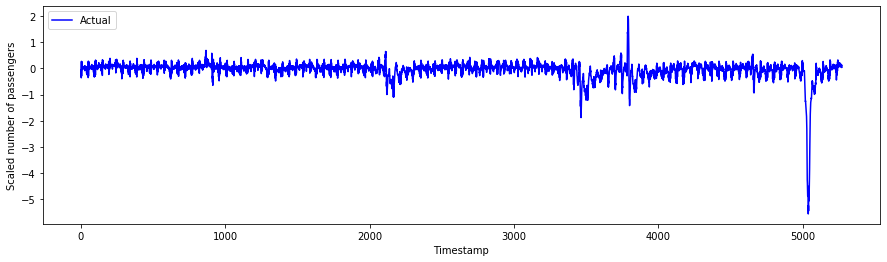

In [122]:
# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

#axs.plot(predd[0],color='red', label='Predicted')
axs.plot(y_test2,color='blue', label='Actual')
plt.xlabel('Timestamp')
plt.ylabel('Scaled number of passengers')
plt.legend(loc='upper left')
plt.show()

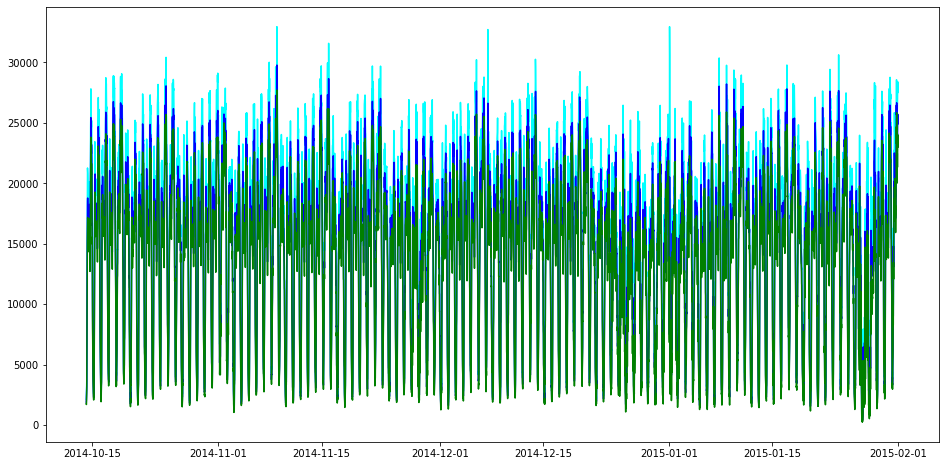

In [123]:
### PLOT QUANTILE PREDICTIONS ###

plt.figure(figsize=(16,8))
plt.plot(test_date2, pred_90_m, color='cyan')
plt.plot(test_date2, pred_50_m, color='blue')
plt.plot(test_date2, pred_10_m, color='green')


### CROSSOVER CHECK ###

plt.scatter(np.where(np.logical_or(pred_50_m>pred_90_m, pred_50_m<pred_10_m))[0], 
            pred_50_m[np.logical_or(pred_50_m>pred_90_m, pred_50_m<pred_10_m)], c='red', s=50)

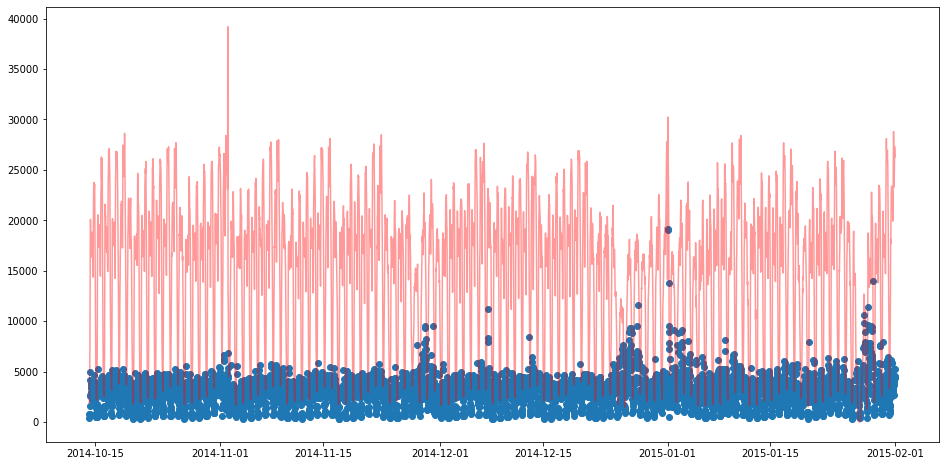

In [127]:
### PLOT UNCERTAINTY INTERVAL LENGHT WITH REAL DATA ###
plt.figure(figsize=(16,8))
plt.plot(test_date2, np.exp(y_test2 + init[5000:]), color='red', alpha=0.4)
plt.scatter(test_date2, pred_90_m - pred_10_m)